Cargar la Informacion del dataset





In [1]:

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://github.com/JaviBrenes/dataset/blob/main/Mall_Customer.xlsx?raw=true'
data = pd.read_excel(url)

Objetivo 2: Identificar patrones en el comportamiento de gasto de los clientes según su género, edad e ingreso anual.

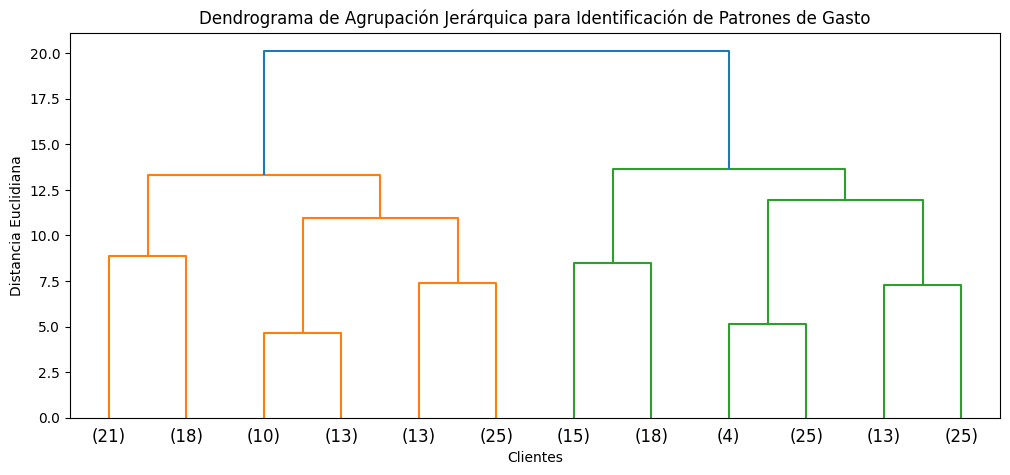

In [2]:
# Preprocesar los datos: Convertir Gender a valores numéricos y manejar valores faltantes
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Convertir los datos escalados a un DataFrame
data_preprocessed = pd.DataFrame(data_scaled, columns=['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Aplicar agrupación jerárquica
Z = linkage(data_preprocessed, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode='lastp', p=12)
plt.title('Dendrograma de Agrupación Jerárquica para Identificación de Patrones de Gasto')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()




Objetivo3.Analizar la distribución demográfica de los clientes y cómo afecta su comportamiento de gasto

In [ ]:
# Aplicar agrupación jerárquica usando solo las características demográficas
Z_demo = linkage(data_preprocessed[['Age', 'Gender', 'Annual Income (k$)']], method='ward')

# Graficar el dendrograma
plt.figure(figsize=(12, 5))
dendrogram(Z_demo, truncate_mode='lastp', p=12)
plt.title('Dendrograma de Agrupación Jerárquica para Distribución Demográfica')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()